# Import Librarys

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import  load_breast_cancer as cancer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  
from joblib import load, dump

# Data

In [10]:
data = cancer()
x = data['data']
y = data['target']

**Features**

In [11]:
print('Training data shape : ',x.shape)
pd.DataFrame(x).head(5)

Training data shape :  (569, 30)


0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 30 columns]

**Labels**

In [8]:
print('Target distribution : ')
pd.Series(y).value_counts()

Target distribution : 


1    357
0    212
dtype: int64

**Features stats**

In [13]:
pd.DataFrame(x).describe()

0           1           2            3           4   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               5           6           7           8           9   ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   
25%      0.064920    0.029560    0.020310    0.161900    0.057700  ...   
50%      0.092630    0.061540    0.033500    0.179200    0.061540  ...   
75%      0.130400    0.130700    0.074000    0.195700    0.066120  ...   
max      0.345400    0.426800    0.201200    0.304000    0.097440  ...   

               20          21          22           23          24  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269190   25.677223  107.261213   880.583128    0.132369   
std      4.833242    6.146258   33.602542   569.356993    0.022832   
min      7.930000   12.020000   50.410000   185.200000    0.071170   
25%     13.010000   21.080000   84.110000   515.300000    0.116600   
50%     14.970000   25.410000   97.660000   686.500000    0.131300   
75%     18.790000   29.720000  125.400000  1084.000000    0.146000   
max     36.040000   49.540000  251.200000  4254.000000    0.222600   

               25          26          27          28          29  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254265    0.272188    0.114606    0.290076    0.083946  
std      0.157336    0.208624    0.065732    0.061867    0.018061  
min      0.027290    0.000000    0.000000    0.156500    0.055040  
25%      0.147200    0.114500    0.064930    0.250400    0.071460  
50%      0.211900    0.226700    0.099930    0.282200    0.080040  
75%      0.339100    0.382900    0.161400    0.317900    0.092080  
max      1.058000    1.252000    0.291000    0.663800    0.207500  

[8 rows x 30 columns]

**Features pairplot**

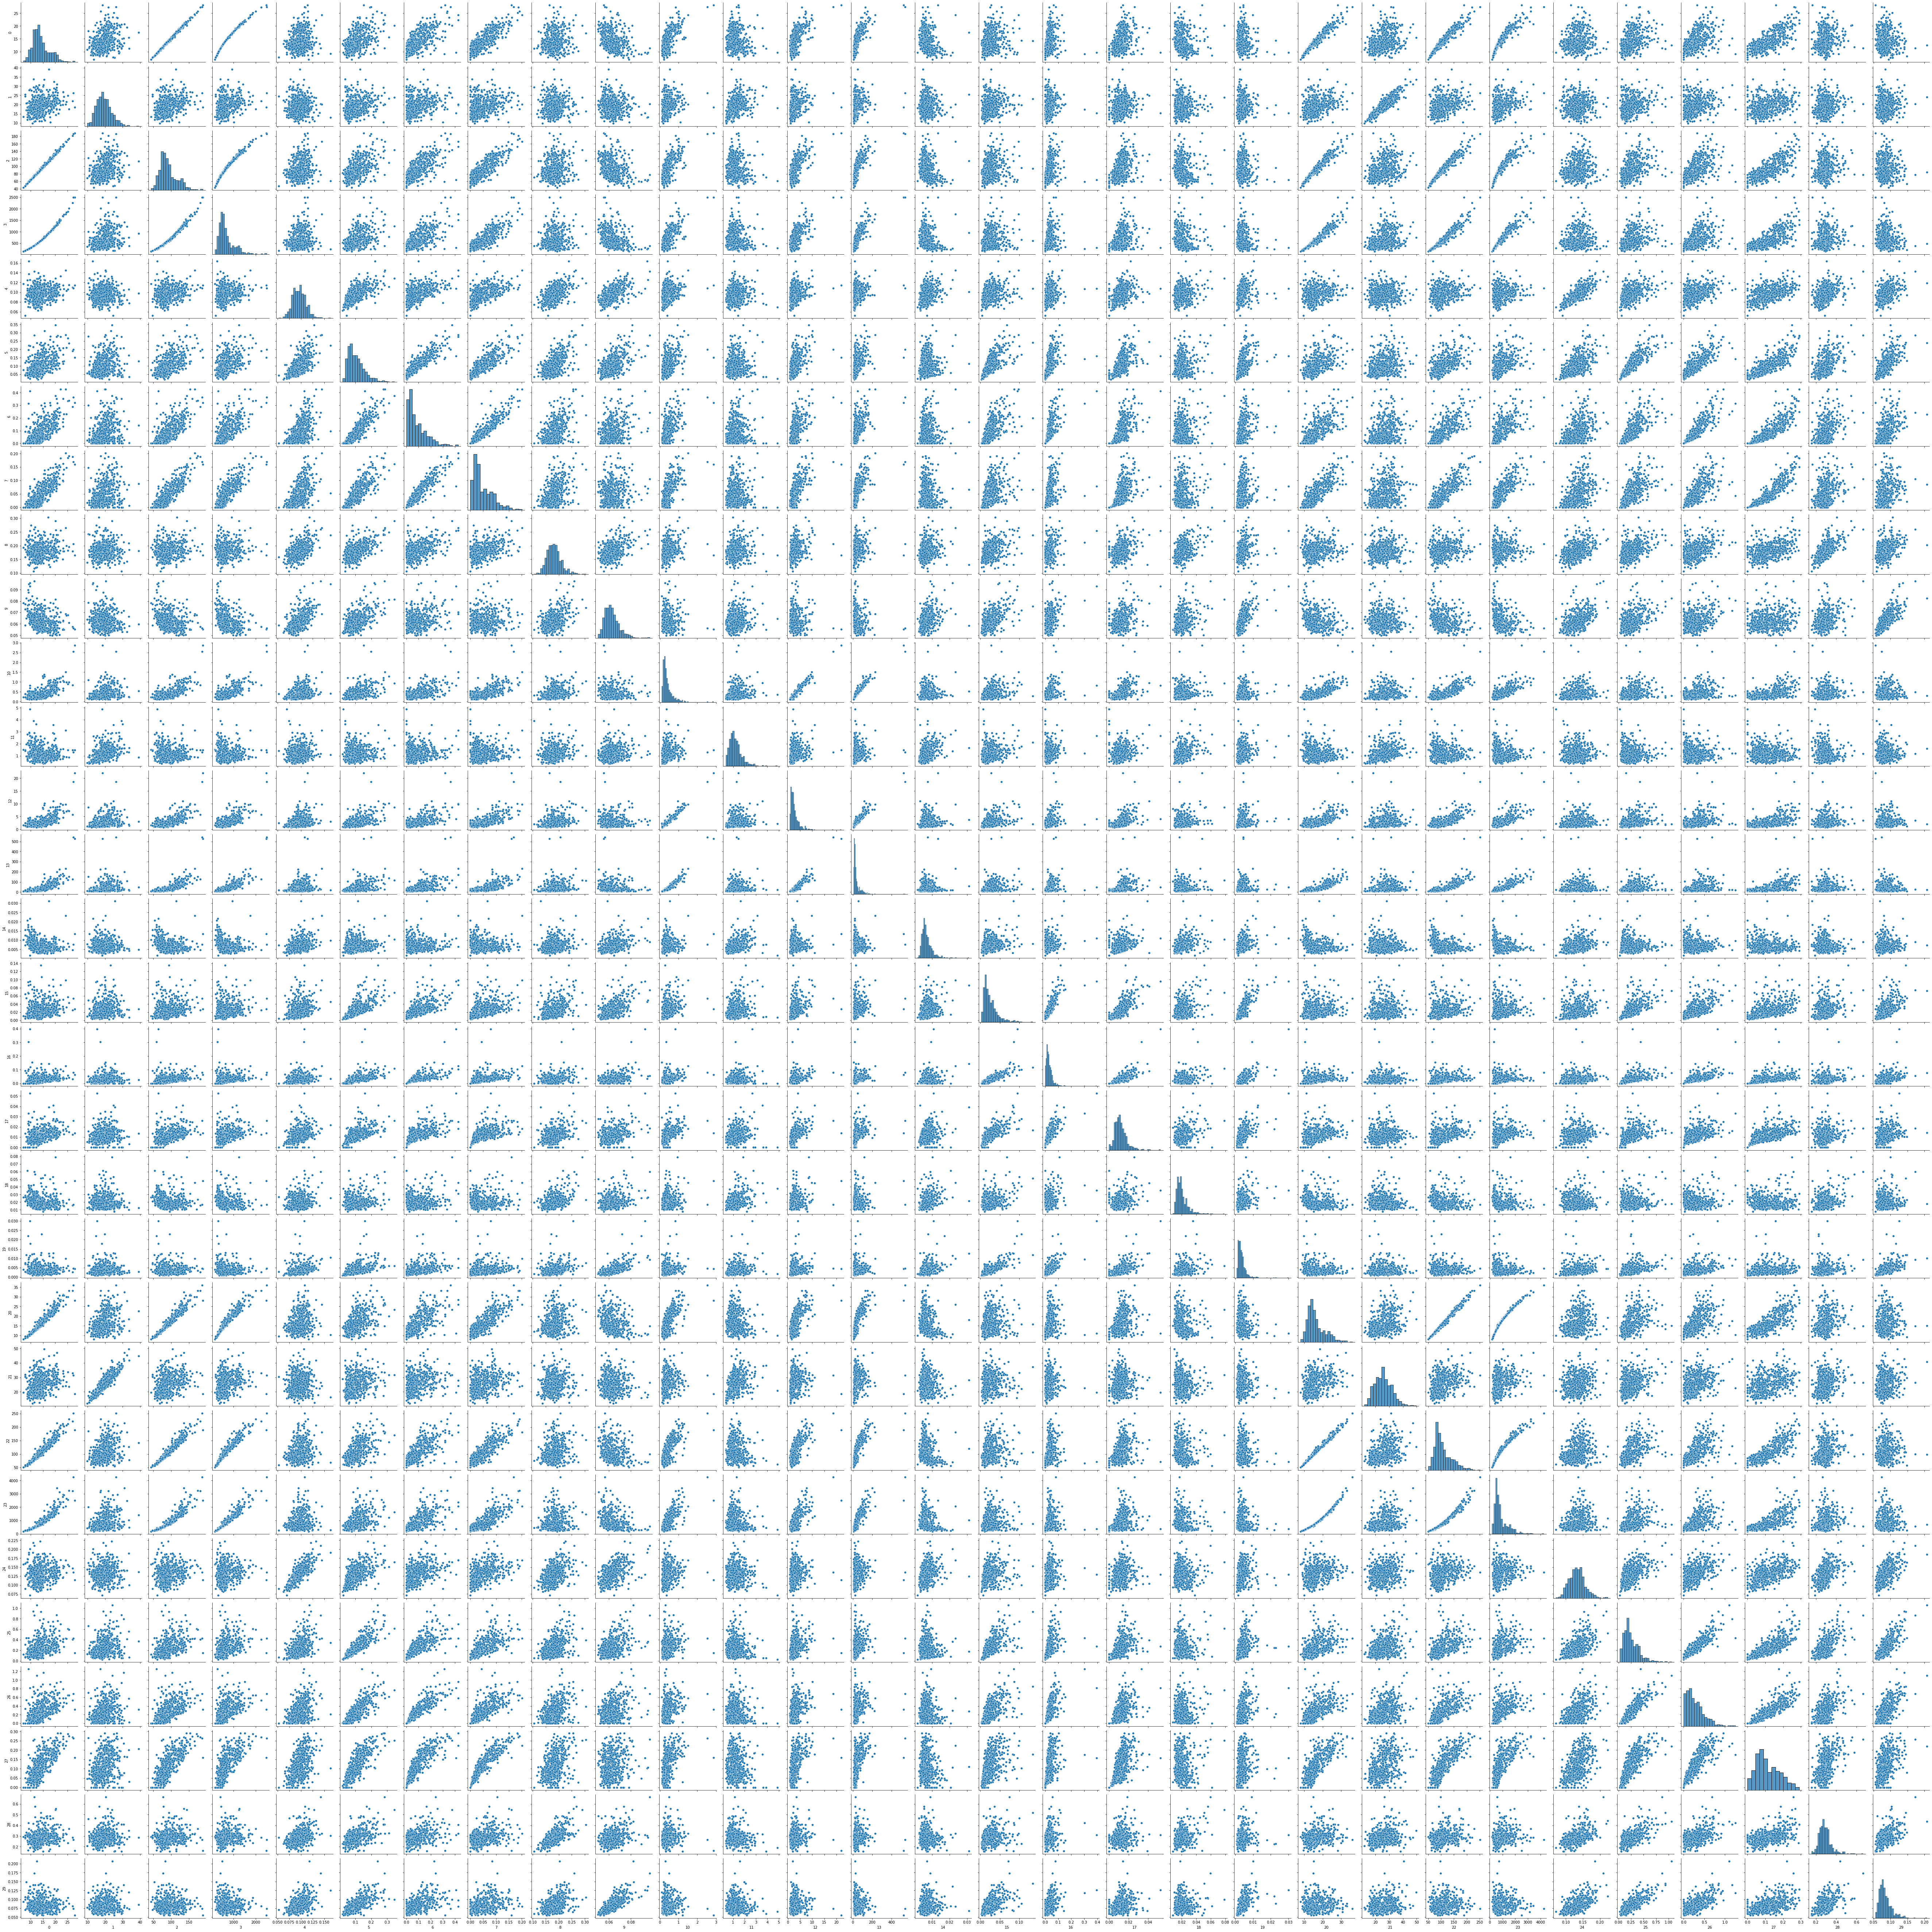

In [17]:
sns.pairplot(pd.DataFrame(x))

# Train test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

# Scaling features

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Cross validation, grid search and best parameter estimation

In [32]:
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'class_weight' : ['balanced',None],
             }
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,n_jobs=-1,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

**Best Estimator**

In [33]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.001)


# Classification reports

**Classification report on train set**

In [38]:
print(classification_report(grid.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       140
           1       0.99      0.98      0.98       241

    accuracy                           0.98       381
   macro avg       0.98      0.98      0.98       381
weighted avg       0.98      0.98      0.98       381



**Classification report on test set**

In [39]:
print(classification_report(grid.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.97      0.98      0.98       117

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



# Save model and scaler for future inference

In [42]:
dump(grid,'./svc_model.joblib')
dump(scaler,'./scaler.joblib')

['./scaler.joblib']